In [ ]:

#importer les bibilotheques necessaires 
import matplotlib.pyplot as plt 
import scipy as sp 
import numpy as np 
import networkx as nx 

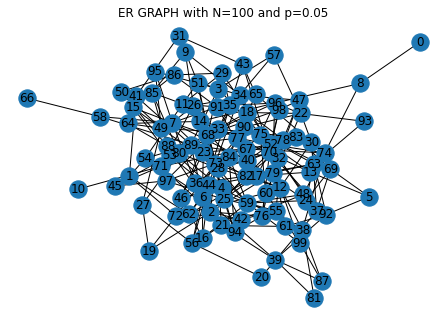

In [ ]:
#ER graph 

G= nx.erdos_renyi_graph(100,0.05)
nx.draw(G, with_labels=True)  
plt.title('ER GRAPH with N=100 and p=0.05')   
plt.draw()

In [ ]:

#nombre de réalisations 
R= np.arange(1,20)
#ER graph 
G=nx.erdos_renyi_graph(100,0.05)
S=nx.adjacency_matrix(G) #we define the shift 
S

<100x100 sparse matrix of type '<class 'numpy.longlong'>'
	with 532 stored elements in Compressed Sparse Row format>

In [ ]:
np.shape(S)

(100, 100)

In [ ]:
#On definie le filtre H
h=np.random.random_sample((4,)) #we define shift's coefficients 
H = np.zeros(100)
S_0 = np.identity(100)
S_2= S@S
S_3=S_2@S
H= h[0]*S_0+ h[1]*S+h[2]*S_2+h[3]*S_3

In [ ]:
H

matrix([[1.06608811, 0.27379727, 0.13689864, ..., 0.        , 0.13689864,
         1.30683987],
        [0.27379727, 0.83805591, 0.15978117, ..., 0.27379727, 0.43357844,
         0.        ],
        [0.13689864, 0.15978117, 0.79229084, ..., 0.27379727, 0.13689864,
         0.13689864],
        ...,
        [0.        , 0.27379727, 0.27379727, ..., 0.74652577, 0.13689864,
         0.        ],
        [0.13689864, 0.43357844, 0.13689864, ..., 0.13689864, 1.08897065,
         0.13689864],
        [1.30683987, 0.        , 0.13689864, ..., 0.        , 0.13689864,
         1.06608811]])

In [ ]:
H_her= H.getH()
C_x= H@H_her

In [ ]:
C_x

matrix([[20.70730552, 14.1256301 ,  8.20027519, ...,  3.02002273,
         10.06636711,  8.12175108],
        [14.1256301 , 51.72447464, 19.70021838, ...,  8.50823306,
         18.28983126, 13.38661761],
        [ 8.20027519, 19.70021838, 17.56240125, ...,  4.45888314,
          6.18382493,  6.25691473],
        ...,
        [ 3.02002273,  8.50823306,  4.45888314, ..., 11.95333061,
          4.26739443,  6.31767929],
        [10.06636711, 18.28983126,  6.18382493, ...,  4.26739443,
         31.39752254,  5.94029744],
        [ 8.12175108, 13.38661761,  6.25691473, ...,  6.31767929,
          5.94029744, 17.95587687]])

In [ ]:
p,V=np.linalg.eig(C_x)
V_her=V.getH()

In [ ]:
p #PSD  
V_her

matrix([[-0.07292192, -0.14582472, -0.06975943, ..., -0.0472267 ,
         -0.08827957, -0.06440107],
        [ 0.0135351 , -0.15228869, -0.08218442, ..., -0.0041144 ,
          0.12352808, -0.03318107],
        [ 0.02809934, -0.04295998,  0.03224129, ..., -0.06783311,
         -0.166131  , -0.03898745],
        ...,
        [-0.08975651,  0.16142362, -0.03528116, ..., -0.13178209,
         -0.01077322, -0.0822221 ],
        [ 0.05749135,  0.03033785,  0.09496868, ...,  0.10735389,
         -0.00366599,  0.05687166],
        [ 0.05059426,  0.00635729, -0.0756188 , ..., -0.07109009,
         -0.08350816,  0.12467393]])

In [ ]:
V@V.getH() '''on vérifie que V est une matrice orthonormale (c'est 
le cas parceque notre graph est non orienté onc notre matrice est symétrique)
'''

matrix([[ 1.00000000e+00,  7.28448877e-14,  1.54520927e-13, ...,
         -9.22786153e-15, -9.73006398e-14,  3.43275755e-13],
        [ 7.28448877e-14,  1.00000000e+00, -1.84780847e-13, ...,
         -9.59114515e-14,  6.58728714e-15, -1.83668727e-13],
        [ 1.54520927e-13, -1.84780847e-13,  1.00000000e+00, ...,
          1.28309689e-13,  1.35474965e-13,  1.02202968e-13],
        ...,
        [-9.22786153e-15, -9.59114515e-14,  1.28309689e-13, ...,
          1.00000000e+00,  1.71834769e-13, -9.30540367e-14],
        [-9.73006398e-14,  6.58728714e-15,  1.35474965e-13, ...,
          1.71834769e-13,  1.00000000e+00,  7.97105437e-15],
        [ 3.43275755e-13, -1.83668727e-13,  1.02202968e-13, ...,
         -9.30540367e-14,  7.97105437e-15,  1.00000000e+00]])

In [ ]:
V_her=np.array(V_her)
V_her

array([[-0.07292192, -0.14582472, -0.06975943, ..., -0.0472267 ,
        -0.08827957, -0.06440107],
       [ 0.0135351 , -0.15228869, -0.08218442, ..., -0.0041144 ,
         0.12352808, -0.03318107],
       [ 0.02809934, -0.04295998,  0.03224129, ..., -0.06783311,
        -0.166131  , -0.03898745],
       ...,
       [-0.08975651,  0.16142362, -0.03528116, ..., -0.13178209,
        -0.01077322, -0.0822221 ],
       [ 0.05749135,  0.03033785,  0.09496868, ...,  0.10735389,
        -0.00366599,  0.05687166],
       [ 0.05059426,  0.00635729, -0.0756188 , ..., -0.07109009,
        -0.08350816,  0.12467393]])

In [ ]:
def module_vec(x): 
  n=np.size(x)
  y=np.zeros((n,1))
  for i in range(n) :
    y[i][0]=x[i]**2
  return y


In [ ]:
w1=np.random.normal(0,1,100)
module_vec(w1)

array([[1.74363002e-06],
       [2.10445102e-05],
       [1.40799458e-02],
       [1.35102154e-01],
       [4.25195770e-01],
       [6.20871965e-01],
       [3.66468211e-02],
       [8.01079036e-01],
       [6.54798563e-08],
       [7.96563836e-03],
       [6.07610201e+00],
       [2.22517062e+00],
       [5.75319783e-01],
       [1.51602520e+00],
       [1.27856735e-02],
       [2.99706137e-02],
       [7.66576936e-04],
       [1.79632927e+00],
       [2.47420480e-03],
       [2.42229512e-01],
       [1.45899658e+00],
       [3.07902807e-02],
       [9.21638940e-01],
       [1.46129835e-01],
       [2.58902275e-01],
       [3.00013919e-01],
       [1.19767272e+00],
       [1.34908035e+00],
       [5.43533894e-01],
       [8.00083514e-01],
       [4.23838823e+00],
       [9.36767429e-02],
       [9.29297707e-01],
       [3.13014124e+00],
       [1.04401213e-04],
       [1.75139807e+00],
       [1.56572043e+00],
       [7.70860859e-01],
       [2.67077556e+00],
       [7.18544497e-01],


In [ ]:
# On génère une liste des erreurs moyennes quadratiques en fonction du nombre des réalisations 
MSE= []
for i in R:
  p_pg =np.zeros((100,1))
  for j in range(1,i+1): 
    w=np.random.normal(0,1,100)
    w=np.transpose(w)
    y=H@w
    y=np.transpose(y)
    p_pg= p_pg + module_vec(np.dot(V_her,y))
  b_pg = p_pg/i - p 
  MSE.append(sp.linalg.norm(b_pg) + 2*sp.linalg.norm(p)**2/i)
MSE = np.array(MSE)  

In [ ]:
#On normalise les MSE calculées 
norm_mse = MSE/np.linalg.norm(MSE)
norm_mse

array([0.78833252, 0.39533158, 0.26495599, 0.19899818, 0.16011786,
       0.1339723 , 0.11561395, 0.10162373, 0.0899484 , 0.08173487,
       0.07420322, 0.06825685, 0.06402894, 0.05934957, 0.0563287 ,
       0.05248724, 0.0490835 , 0.04720953, 0.04514737])

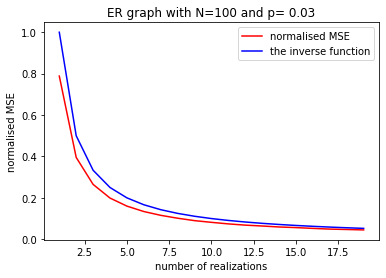

In [ ]:
#code pour afficher les courbes  
plt.plot(R,norm_mse, color ='r')
plt.plot(R,1/R, color = 'b')
'''On compare la valeur du MSE théorique(qui est la fonction inverse R --> 1/R ) 
avec celle qui a été calculé par des moyens epiriques.
'''
plt.xlabel("number of realizations")
plt.ylabel('normalised MSE' )
plt.legend(['normalised MSE','the inverse function'])
plt.title('ER graph with N=100 and p= 0.03')
plt.show()